<a href="https://colab.research.google.com/github/lavanyaravid/Lavanyaradaja/blob/main/Source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naan Mudalvan project:

Decoding Emotions Detections Through Sentiment Analysis:

0-sadness,1-joy,2-love,3-anger,
4-fear,5-surprice

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)

In [ ]:
df=pd.read_csv('emotions.csv')
df = df.drop_duplicates()
df = df.dropna()
print(df)

                                                     text  label
0           i just feel really helpless and heavy hearted    4.0
1       ive enjoyed being able to slouch about relax a...    0.0
2       i gave up my internship with the dmrg and am f...    4.0
3                              i dont know i feel so lost    0.0
4       i am a kindergarten teacher and i am thoroughl...    4.0
...                                                   ...    ...
363130  i do want to do it i feel that it s very vital...    1.0
363131  i feel longing in myself or see it in others i...    2.0
363132  i cant feel terrific as usual but it was not d...    1.0
363133             i feel impatient to get moving forward    3.0
363134  i get nervous about who is going to be sitting...    1.0

[362593 rows x 2 columns]


In [ ]:
print(df.head())

                                                text  label
0      i just feel really helpless and heavy hearted    4.0
1  ive enjoyed being able to slouch about relax a...    0.0
2  i gave up my internship with the dmrg and am f...    4.0
3                         i dont know i feel so lost    0.0
4  i am a kindergarten teacher and i am thoroughl...    4.0


In [ ]:
def clean_text(text):
  text=re.sub(r"http\s+","",text)
  text=text.translate(str.maketrans('','',string.punctuation))
  return text
  df['clean_text']=df['text'].apply(clean_text)
  print (df['clean_text'])
print (df.head())


                                                text  label
0      i just feel really helpless and heavy hearted    4.0
1  ive enjoyed being able to slouch about relax a...    0.0
2  i gave up my internship with the dmrg and am f...    4.0
3                         i dont know i feel so lost    0.0
4  i am a kindergarten teacher and i am thoroughl...    4.0


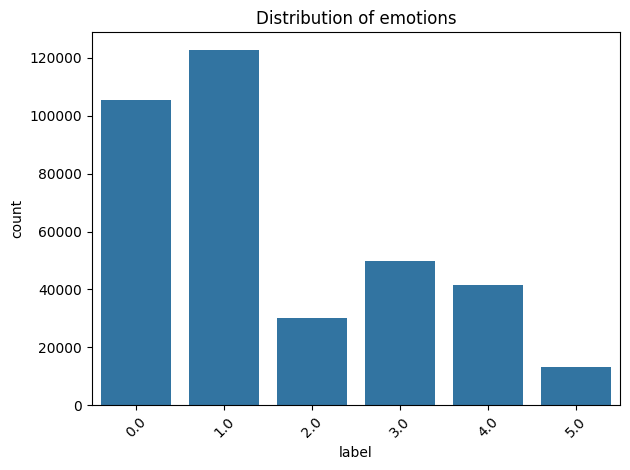

In [ ]:
sns.countplot(x='label',data=df)
plt.title('Distribution of emotions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

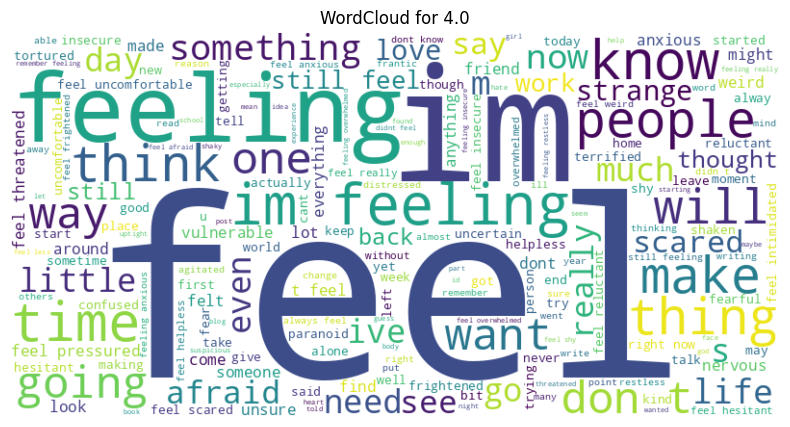

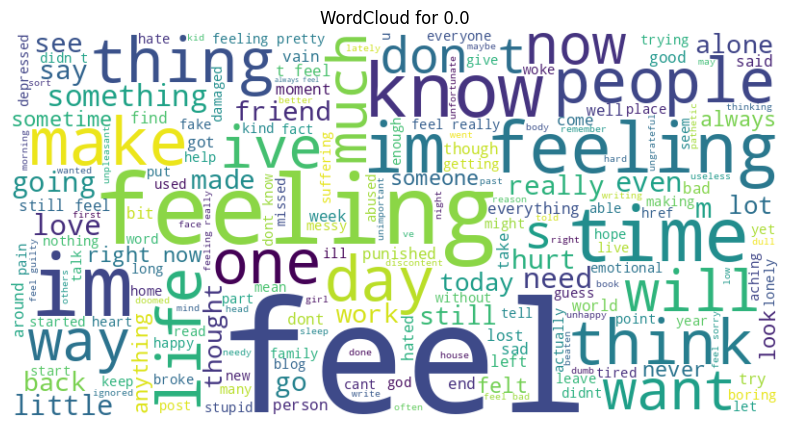

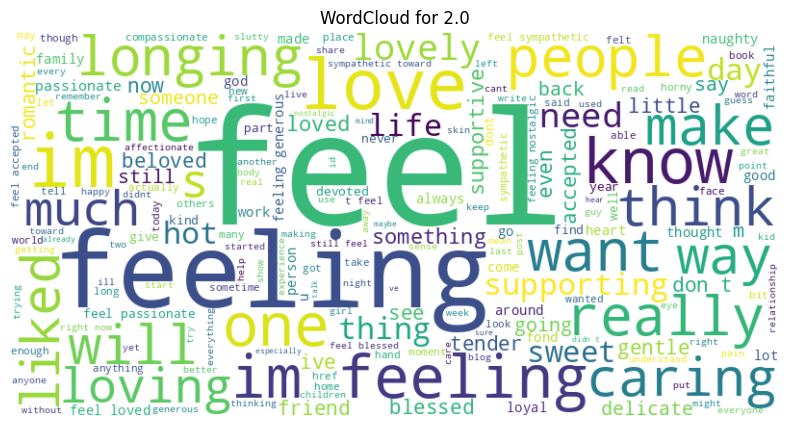

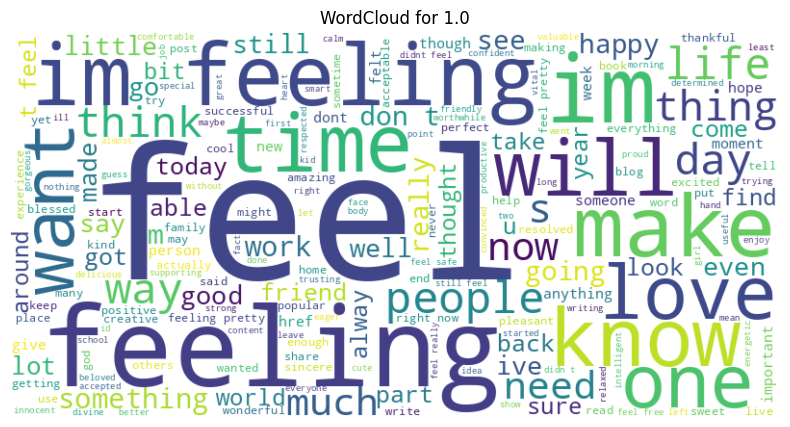

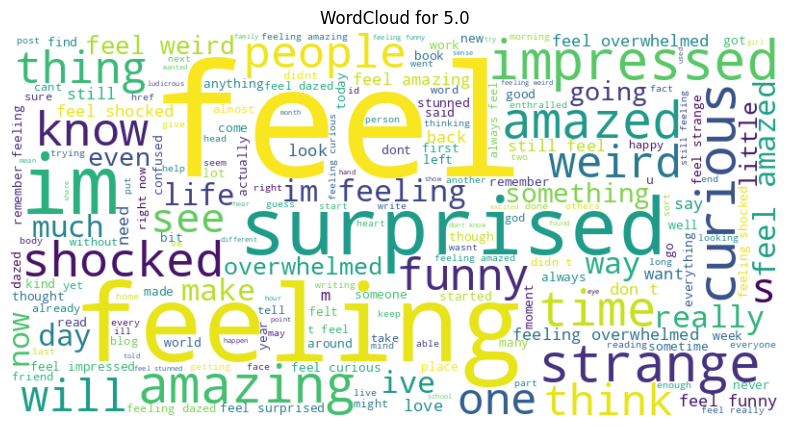

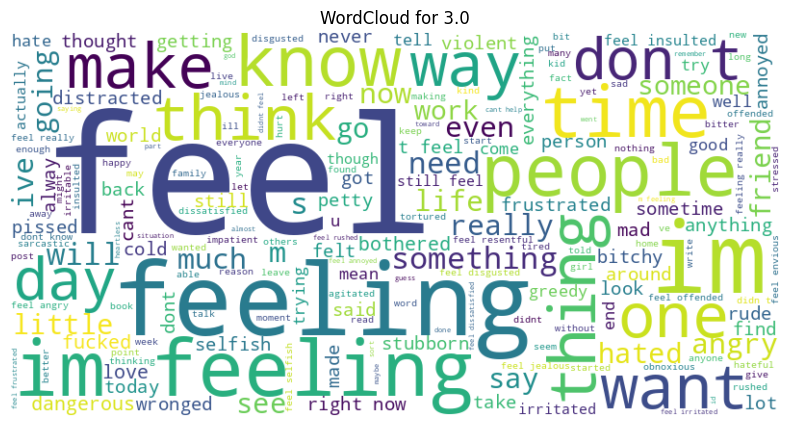

In [26]:
def clean_text(text):
  text=re.sub(r"http\s+","",text)
  text=text.translate(str.maketrans('','',string.punctuation))
  return text
df['clean_text']=df['text'].apply(clean_text) # Moved this line outside the function
emotion_types=df['label'].unique()
for emotion in emotion_types:
  text=' '.join(df[df['label']==emotion]['clean_text'])
  wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.title(f'WordCloud for {emotion}')
  plt.axis('off')
  plt.show()

In [ ]:
X=df['clean_text']
y=df['label']
vectorizer=TfidfVectorizer(max_features=5000)
X_vec=vectorizer.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_vec,y,test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)


LogisticRegression(max_iter=1000)

Classification Report:
Accuracy: 0.9023704132710049
Precision: 0.9014348799074804
Recall: 0.9023704132710049
F1 Score: 0.9017486964559323

Confusion Matrix:
 [[19692   311    73   475   308    36]
 [  284 23096   839   143   104   130]
 [   71  1214  4676    34    14    13]
 [  466   212    36  9089   297    18]
 [  416   176    27   325  6986   336]
 [   66   189    11    14   442  1900]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     20895
         1.0       0.92      0.94      0.93     24596
         2.0       0.83      0.78      0.80      6022
         3.0       0.90      0.90      0.90     10118
         4.0       0.86      0.85      0.85      8266
         5.0       0.78      0.72      0.75      2622

    accuracy                           0.90     72519
   macro avg       0.87      0.85      0.86     72519
weighted avg       0.90      0.90      0.90     72519



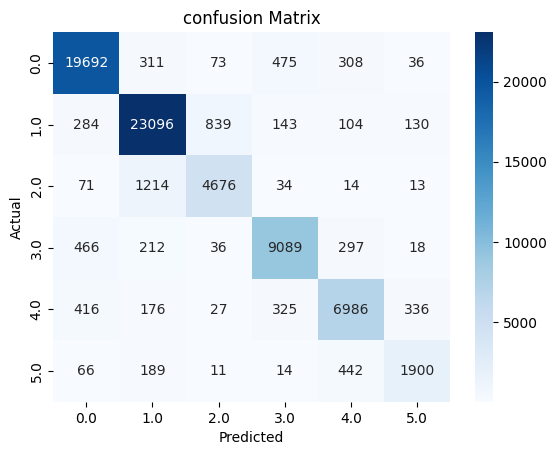

In [27]:
y_pred=model.predict(X_test)
print("Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted')) # Changed average to 'weighted'
print("Recall:", recall_score(y_test, y_pred, average='weighted')) # Changed average to 'weighted'
print("F1 Score:", f1_score(y_test, y_pred, average='weighted')) # Changed average to 'weighted'
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues') # Changed cm to confusion_matrix(y_test, y_pred)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion Matrix')
plt.show()

In [ ]:
def predict_emotion(text):
  cleaned=clean_text(text)
  vec=vectorizer.transform([cleaned])
  return model.predict(vec)[0]
print(predict_emotion("This is the Best day ever."))


 joy


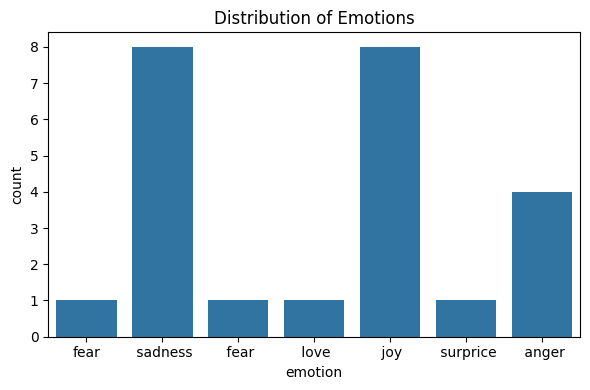

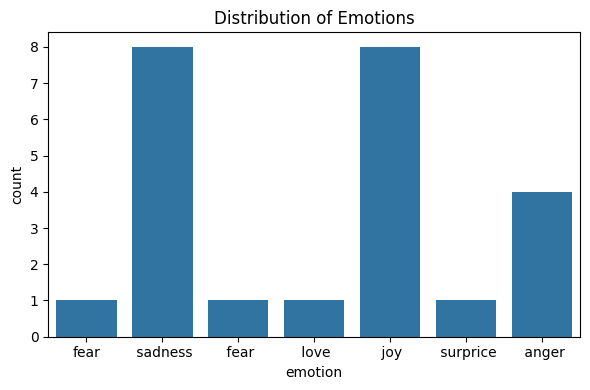

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='emotion',data=df)
plt.title('Distribution of Emotions')
plt.tight_layout()
display(plt.gcf())


In [ ]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Replace with your own keys
consumer_key = "your_key"
consumer_secret = "your_secret"
access_token = "your_token"
access_token_secret = "your_token_secret"

auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
def fetch_tweets(que⁶ry, count=100):
      tweets = tweepy.Cursor(api.search_tweets, q=query, lang="en", tweet_mode='extended').items(count)
      tweet_list = [[tweet.full_text, tweet.created_at] for tweet in tweets]
      return pd.DataFrame(tweet_list, columns=['Text', 'Date'])

                  # Example usage:
                      # df = fetch_tweets("mental health", 200)